# Overview

This is the final script of the final project for Civic Analytics at NYC CUSP. It includes the following sections:

- Data Ingestion and Processing
- Modelling
- Data Exporting
- Analysis and Visualization

Contributor
- Ian Xiao
- Ben Steers
- Te Du

---

## Data Ingestion and Processing

In [1]:
# Import
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%pylab inline

from IPython.display import HTML, display as d

pd.set_option('display.max_columns', 500)

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Ingest data from project github
# Please see Data Processing script for detailed steps (TO BE UPLOADED)
url = "https://raw.githubusercontent.com/td928/CAUI_team1_Final_Project/master/merged-w-latlon.csv"
df = pd.read_csv(url)
df.head()

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude
0,1011860091,60.9,63121.0,70.9,58266.0,68.6,58266.0,68.3,58266.0,100.0,Multifamily Housing,26.45,67417.0,Whole Building,Whole Building,1.157056,MN,6641,58266,0,58266,0,0,12.0,25,25,1910,989141.0,225102.0,10024.0,316 WEST 79 STREET,-73.982338,40.784528
1,1000167501,64.9,199141.0,74.2,220821.0,77.0,220821.0,76.2,220821.0,100.0,Multifamily Housing,52.01,10441275.8,Whole Building,Whole Building,47.283890,MN,16951,179174,1092,177488,0,1092,25.0,238,239,1985,979290.0,197895.0,10280.0,377 RECTOR PLACE,-74.017891,40.709851
2,1000167502,71.5,150667.0,74.8,150855.0,41.1,150855.0,74.2,150855.0,100.0,Multifamily Housing,44.60,2332818.2,Whole Building,Whole Building,15.463977,MN,27838,123284,11136,112148,0,0,15.0,133,133,1986,979379.0,197988.0,10280.0,350 ALBANY STREET,-74.017570,40.710107
3,1000167504,74.6,112312.0,77.7,91774.0,73.3,91774.0,71.7,91774.0,100.0,Multifamily Housing,39.22,4395045.3,Whole Building,Not Available,47.889874,MN,16108,72913,4295,68618,0,4295,9.0,107,110,1986,979576.0,197918.0,10280.0,300 ALBANY STREET,-74.016859,40.709915
4,1000167505,116.7,235366.0,106.2,257092.0,106.7,257092.0,101.7,257092.0,100.0,Multifamily Housing,56.40,16783196.3,Whole Building,Not Available,65.280897,MN,23910,203837,1177,202660,1177,0,26.0,246,247,1987,979243.0,197613.0,10280.0,380 RECTOR PLACE,-74.018060,40.709077


In [8]:
df.dtypes

BBL                         int64
EUI_2013                  float64
floorArea_2013            float64
EUI_2014                  float64
floorArea_2014            float64
EUI_2015                  float64
floorArea_2015            float64
EUI_2016                  float64
floorArea_2016            float64
Occupancy                 float64
TYPE_2016                  object
water_intensity           float64
naturalgas_use            float64
Metered Areas (Energy)     object
Metered Areas  (Water)     object
naturalgas_intensity      float64
Borough                    object
LotArea                     int64
BldgArea                    int64
ComArea                     int64
ResArea                     int64
OfficeArea                  int64
RetailArea                  int64
NumFloors                 float64
UnitsRes                    int64
UnitsTotal                  int64
YearBuilt                   int64
XCoord                    float64
YCoord                    float64
ZipCode       

In [9]:
# Create a Age feature based on Built Year
df["age"] = datetime.datetime.now().year - df['YearBuilt']

# Create Average EUI of 2013, 2014, and 2015
df["avgEUI"] = df[['EUI_2013', 'EUI_2014', 'EUI_2015']].mean(axis=1)

df.head(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI
0,1011860091,60.9,63121.0,70.9,58266.0,68.6,58266.0,68.3,58266.0,100.0,Multifamily Housing,26.45,67417.0,Whole Building,Whole Building,1.157056,MN,6641,58266,0,58266,0,0,12.0,25,25,1910,989141.0,225102.0,10024.0,316 WEST 79 STREET,-73.982338,40.784528,107,66.800000
1,1000167501,64.9,199141.0,74.2,220821.0,77.0,220821.0,76.2,220821.0,100.0,Multifamily Housing,52.01,10441275.8,Whole Building,Whole Building,47.283890,MN,16951,179174,1092,177488,0,1092,25.0,238,239,1985,979290.0,197895.0,10280.0,377 RECTOR PLACE,-74.017891,40.709851,32,72.033333
2,1000167502,71.5,150667.0,74.8,150855.0,41.1,150855.0,74.2,150855.0,100.0,Multifamily Housing,44.60,2332818.2,Whole Building,Whole Building,15.463977,MN,27838,123284,11136,112148,0,0,15.0,133,133,1986,979379.0,197988.0,10280.0,350 ALBANY STREET,-74.017570,40.710107,31,62.466667
3,1000167504,74.6,112312.0,77.7,91774.0,73.3,91774.0,71.7,91774.0,100.0,Multifamily Housing,39.22,4395045.3,Whole Building,Not Available,47.889874,MN,16108,72913,4295,68618,0,4295,9.0,107,110,1986,979576.0,197918.0,10280.0,300 ALBANY STREET,-74.016859,40.709915,31,75.200000
4,1000167505,116.7,235366.0,106.2,257092.0,106.7,257092.0,101.7,257092.0,100.0,Multifamily Housing,56.40,16783196.3,Whole Building,Not Available,65.280897,MN,23910,203837,1177,202660,1177,0,26.0,246,247,1987,979243.0,197613.0,10280.0,380 RECTOR PLACE,-74.018060,40.709077,30,109.866667
5,1000167506,77.3,111398.0,80.2,106631.0,80.3,106631.0,77.2,106631.0,100.0,Multifamily Housing,41.26,5756290.8,Whole Building,Whole Building,53.983277,MN,15000,81667,502,81165,0,502,9.0,121,122,1985,979576.0,197463.0,10280.0,280 RECTOR PLACE,-74.016859,40.708666,32,79.266667
6,1000167507,56.6,163863.0,62.0,129176.0,62.1,129176.0,61.9,129176.0,100.0,Multifamily Housing,43.29,6951841.3,Whole Building,Whole Building,53.816818,MN,25978,106271,3168,103103,0,3168,9.0,153,154,1986,979385.0,197552.0,10280.0,300 RECTOR PLACE,-74.017548,40.708910,31,60.233333
7,1000167508,91.6,517639.0,93.1,590974.0,93.3,590974.0,86.9,590974.0,100.0,Multifamily Housing,48.08,31758766.1,Whole Building,Whole Building,53.739701,MN,37248,428589,4750,423839,1640,3110,44.0,545,547,1987,979703.0,197392.0,10280.0,200 RECTOR PLACE,-74.016401,40.708471,30,92.666667
8,1000167509,160.0,225262.0,108.1,237270.0,89.0,237270.0,100.0,237270.0,100.0,Multifamily Housing,69.24,11837980.8,Whole Building,Not Available,49.892447,MN,45203,194762,32279,162483,0,28464,9.0,182,184,1988,979227.0,197334.0,10280.0,21 SOUTH END AVENUE,-74.018117,40.708312,29,119.033333
9,1000167510,66.9,296200.0,74.7,348953.0,80.3,348953.0,78.3,348953.0,100.0,Multifamily Housing,40.76,15207412.8,Whole Building,Whole Building,43.580118,MN,24167,251929,7464,244465,6885,0,28.0,293,294,1988,979649.0,197083.0,10280.0,99 BATTERY PLACE,-74.016595,40.707623,29,73.966667


In [10]:
print("--- Number of Missing Value in Each Column ---")
d(df.isnull().sum())
len_before = len(df)

# Drop rows with any missing value
model_df = df.dropna()
len(model_df) - len_before, 'dropped'

--- Number of Missing Value in Each Column ---


BBL                       0
EUI_2013                  0
floorArea_2013            0
EUI_2014                  0
floorArea_2014            0
EUI_2015                  0
floorArea_2015            0
EUI_2016                  0
floorArea_2016            0
Occupancy                 0
TYPE_2016                 0
water_intensity           0
naturalgas_use            0
Metered Areas (Energy)    0
Metered Areas  (Water)    0
naturalgas_intensity      0
Borough                   0
LotArea                   0
BldgArea                  0
ComArea                   0
ResArea                   0
OfficeArea                0
RetailArea                0
NumFloors                 0
UnitsRes                  0
UnitsTotal                0
YearBuilt                 0
XCoord                    0
YCoord                    0
ZipCode                   0
Address                   0
Longitude                 0
Latitude                  0
age                       0
avgEUI                    0
dtype: int64

(0, 'dropped')

In [11]:
# Select only Multi-family buildings for Modelling 

model_df = model_df[(model_df.TYPE_2016 == 'Multifamily Housing')]
print("Number of Records in the Modelling Dataset: {}".format(model_df.shape[0]))

Number of Records in the Modelling Dataset: 3538


--- 

## Modelling
- Calculate EER using K-Means
- Calculate EER using Linear Regression

EER Calculation:
- In K-Means, EER = actual EUI 2016 / K-mean Group EUI 2016.
- In Linear Regression, EER = actual EUI 2016 / Predicted EUI 2016

In [12]:
model_df.dtypes

BBL                         int64
EUI_2013                  float64
floorArea_2013            float64
EUI_2014                  float64
floorArea_2014            float64
EUI_2015                  float64
floorArea_2015            float64
EUI_2016                  float64
floorArea_2016            float64
Occupancy                 float64
TYPE_2016                  object
water_intensity           float64
naturalgas_use            float64
Metered Areas (Energy)     object
Metered Areas  (Water)     object
naturalgas_intensity      float64
Borough                    object
LotArea                     int64
BldgArea                    int64
ComArea                     int64
ResArea                     int64
OfficeArea                  int64
RetailArea                  int64
NumFloors                 float64
UnitsRes                    int64
UnitsTotal                  int64
YearBuilt                   int64
XCoord                    float64
YCoord                    float64
ZipCode       

In [7]:
# Perform K-Means

kmean_features = ['age', 'Occupancy', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal', 'avgEUI']
init = 100
seed = 123

kmeans = KMeans(n_clusters=3, random_state = seed, n_init = init).fit(model_df[kmean_features])
model_df['km_group'] = kmeans.predict(model_df[kmean_features])

# @IAN updat

In [8]:
model_df.groupby('km_group').size()

km_group
0     855
1    6636
2     158
dtype: int64

# @IAN ~need to calculate stats for water and natural gas as well~

In [9]:
# Calculate k-mean based EUI stats from Iteration 1
km_stats = pd.pivot_table(model_df, index= 'km_group', values= "EUI_2016",
                               aggfunc= [np.mean, np.median, min, max, np.std, np.size])

# Rename Columns by Joining with "_"
km_stats.columns = ["Group_"+"_".join((i,j)) for i,j in km_stats.columns]
km_stats = km_stats.reset_index()

km_stats

,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
0,0,265.500117,105.1,0.0,49924.0,2026.773072,855.0
1,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
2,2,2944.470253,223.0,18.7,32513.5,7810.753742,158.0


In [10]:
# Merge with Original Modelling Dataset
km_df = model_df.merge(km_stats, how="left", left_on="km_group", right_on="km_group")

In [11]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Latitude,Longitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
5869,4022520010,88.6,250034.0,154.4,238128.0,106.7,238128.0,66.7,238128.0,Multifamily Housing,QN,113664.0,238128.0,0.0,238128.0,0.0,0.0,6.0,221.0,221.0,1956.0,1029419.0,201625.0,11375.0,112-20 112 STREET,40.719975,-73.837051,61.0,116.566667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
5488,4011380030,95.9,56344.0,113.2,65810.0,115.5,65810.0,122.7,65810.0,Multifamily Housing,QN,18400.0,65810.0,0.0,65810.0,0.0,0.0,6.0,74.0,74.0,1964.0,1012121.0,215202.0,11377.0,31-16 68 STREET,40.757312,-73.899398,53.0,108.200000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
2573,1021800435,73.4,90198.0,72.4,90198.0,69.2,90198.0,75.8,90198.0,Multifamily Housing,MN,20050.0,90198.0,0.0,90198.0,0.0,0.0,6.0,86.0,86.0,1941.0,1002076.0,251407.0,10040.0,680 FT WASHINGTON AVENUE,40.856711,-73.935560,76.0,71.666667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
5457,4015060062,74.9,110365.0,82.3,100332.0,82.7,100332.0,99.2,100332.0,Multifamily Housing,QN,25000.0,100332.0,0.0,100332.0,0.0,0.0,6.0,123.0,123.0,1963.0,1017072.0,210733.0,11373.0,41-67 JUDGE STREET,40.745029,-73.881549,54.0,79.966667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
2790,2023597501,13.7,291333.0,50.1,246902.0,50.2,246902.0,47.3,246902.0,Multifamily Housing,BX,61422.0,246902.0,9634.0,237268.0,0.0,3847.0,20.0,222.0,224.0,2010.0,1008534.0,237641.0,10455.0,700-704 BROOK AVENUE,40.818912,-73.912264,7.0,38.000000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
5741,2051150001,30.7,70125.0,34.2,63750.0,146.2,63750.0,126.9,63750.0,Multifamily Housing,BX,18020.0,63750.0,0.0,63750.0,0.0,0.0,5.0,61.0,61.0,1931.0,1026322.0,269226.0,10470.0,735 EAST 242 STREET,40.905536,-73.847800,86.0,70.366667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
4612,2032510490,48.8,690612.0,45.5,1074489.0,201.3,1074489.0,196.1,1074490.0,Multifamily Housing,BX,68259.0,1074490.0,600.0,1073889.0,0.0,600.0,42.0,871.0,872.0,1975.0,1015750.0,259655.0,10468.0,40 W MOSHOLU PARKWAY S,40.879311,-73.886090,42.0,98.533333,2,2944.470253,223.0,18.7,32513.5,7810.753742,158.0
6087,4050030028,89.8,68250.0,96.8,75300.0,99.8,75300.0,97.7,75300.0,Multifamily Housing,QN,30000.0,75300.0,7050.0,68250.0,0.0,0.0,6.0,84.0,84.0,1951.0,1033649.0,218318.0,11354.0,144-50 35 AVENUE,40.765771,-73.821669,66.0,95.466667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
483,1007510001,113.9,409200.0,107.0,1467268.0,109.2,1467268.0,98.4,1489943.0,Multifamily Housing,MN,393100.0,1489943.0,281603.0,1208340.0,0.0,56026.0,22.0,1510.0,1521.0,1960.0,984813.0,211962.0,10001.0,270 9 AVENUE,40.748463,-73.997968,57.0,110.033333,2,2944.470253,223.0,18.7,32513.5,7810.753742,158.0
1173,1012060045,89.6,120000.0,93.4,137634.0,86.5,137634.0,92.6,137635.0,Multifamily Housing,MN,38270.0,137635.0,0.0,137634.0,0.0,0.0,8.0,123.0,124.0,1971.0,993133.0,227189.0,10025.0,50 WEST 93 STREET,40.790253,-73.967920,46.0,89.833333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0


In [12]:
km_df['EER_km'] = km_df['EUI_2016'] / km_df['Group_mean_EUI_2016']
km_df['WER_km'] = km_df['water_intensity'] / km_df['Group_mean_water_intensity']
km_df['NER_km'] = km_df['naturalgas_intensity'] / km_df['Group_mean_naturalgas_intensity']
km_df[['EER_km', 'WER_km', 'NER_km']].describe()

count    7649.000000
mean        1.000000
std        12.620905
min         0.000000
25%         0.320431
50%         0.400892
75%         0.491704
max       547.033440
Name: EER_km, dtype: float64

In [13]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Latitude,Longitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016,EER_km
1382,1013250024,65.0,215395.0,86.3,206945.0,85.4,206945.0,80.5,206945.0,Multifamily Housing,MN,15062.0,206945.0,7500.0,199445.0,0.0,7500.0,20.0,191.0,195.0,1960.0,993027.0,214657.0,10022.0,963 2 AVENUE,40.755856,-73.968320,57.0,78.900000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.378777
1634,1014127503,71.7,72438.0,78.6,72296.0,77.2,72296.0,73.3,72296.0,Multifamily Housing,MN,10260.0,72438.0,0.0,72438.0,0.0,0.0,12.0,57.0,57.0,1942.0,995720.0,221034.0,10075.0,177 EAST 77 STREET,40.773356,-73.958588,75.0,75.833333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.344899
2981,2026230060,56.9,56252.0,70.9,50254.0,68.2,50254.0,113.3,50254.0,Multifamily Housing,BX,10705.0,50254.0,0.0,50254.0,0.0,0.0,5.0,40.0,40.0,1923.0,1008851.0,235839.0,10455.0,611 EAST 149 STREET,40.813965,-73.911126,94.0,65.333333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.533111
6060,4047560001,330.0,73480.0,360.0,158640.0,339.9,158640.0,283.6,158640.0,Multifamily Housing,QN,303600.0,158640.0,0.0,158640.0,0.0,0.0,2.0,176.0,176.0,1951.0,1039276.0,224918.0,11357.0,16-37 160 STREET,40.783853,-73.801301,66.0,343.300000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,1.334424
4184,3010590061,80.8,57700.0,84.7,57700.0,80.7,57700.0,70.6,57700.0,Multifamily Housing,BK,8712.0,57700.0,0.0,57700.0,0.0,0.0,10.0,59.0,59.0,1928.0,991675.0,185378.0,11217.0,209 LINCOLN PLACE,40.675493,-73.973232,89.0,82.066667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.332194
4866,1009447501,74.5,126994.0,86.2,119913.0,88.0,119913.0,76.9,119913.0,Multifamily Housing,MN,9391.0,88135.0,518.0,87617.0,0.0,518.0,28.0,118.0,119.0,1984.0,991670.0,211518.0,10016.0,311 EAST 38 STREET,40.747241,-73.973221,33.0,82.900000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.361838
5255,2046420006,80.8,85000.0,99.7,80350.0,72.3,80350.0,95.4,80350.0,Multifamily Housing,BX,23125.0,80350.0,0.0,80350.0,0.0,0.0,7.0,87.0,87.0,1963.0,1020871.0,259318.0,10467.0,3520 OLINVILLE AVENUE,40.878366,-73.867574,54.0,84.266667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.448886
6835,4071170006,64.2,14670.0,235.6,410788.0,305.5,410788.0,275.6,410788.0,Multifamily Housing,QN,790500.0,410788.0,24360.0,386428.0,0.0,0.0,2.0,410.0,411.0,1950.0,1045694.0,208925.0,11365.0,194-05 67 AVENUE,40.739914,-73.778272,67.0,201.766667,0,265.500117,105.1,0.0,49924.0,2026.773072,855.0,1.038041
5208,3073810079,75.1,99000.0,85.3,98000.0,85.1,98000.0,82.8,98000.0,Multifamily Housing,BK,34595.0,98000.0,0.0,98000.0,0.0,0.0,6.0,85.0,85.0,1954.0,998015.0,156503.0,11229.0,2675 OCEAN AVENUE,40.596230,-73.950434,63.0,81.833333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.389599
2729,1022210030,106.5,78233.0,108.4,68454.0,110.3,68454.0,101.9,68454.0,Multifamily Housing,MN,22500.0,68454.0,0.0,68454.0,0.0,0.0,6.0,66.0,66.0,1925.0,1005790.0,254113.0,10034.0,74 POST AVENUE,40.864130,-73.922125,92.0,108.400000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.479470


# LINEAR REGRESSION

input dataset: use model_df

output dataset: name it lr_df with on the following columns:
- BBL
- Pred_EER
- EER_lr = (EUI_2016/ Pred_EER) <- not needed based on our discussion, but let's just do it in case we need it

In [13]:
lr_years = [2013, 2014, 2015, 2016]
lr_features = ['age', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal']

lr_df = model_df[['BBL']].copy()

# Train model for electricity
# Use EUI for all years
X = pd.concat([model_df[lr_features] for _ in lr_years]) # Duplicate len(years) times
y = pd.concat([model_df['EUI_{}'.format(y)] for y in lr_years]) # Get EUI for each year
lrmodel = LinearRegression().fit(X, y)

# Store predictions
lr_df['Pred_EUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['EER_lr'] = model_df['EUI_2016'] / lr_df['Pred_EUI_lr']

# Train model for water
lrmodel = LinearRegression().fit(model_df[lr_features], model_df['water_intensity'])

# Store predictions
lr_df['Pred_WUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['WER_lr'] = model_df['water_intensity'] / lr_df['Pred_WUI_lr']

# Train model for natural gas
lrmodel = LinearRegression().fit(model_df[lr_features], model_df['naturalgas_intensity'])

# Store predictions
lr_df['Pred_NUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['NER_lr'] = model_df['naturalgas_intensity'] / lr_df['Pred_NUI_lr']

lr_df.head()

,BBL,Pred_EUI_lr,EER_lr,Pred_WUI_lr,WER_lr,Pred_NUI_lr,NER_lr
0,1011860091,118.101796,0.578315,65.218895,0.405557,39.393148,0.029372
1,1000167501,157.387020,0.484157,36.699431,1.417188,49.438675,0.956415
2,1000167502,140.929320,0.526505,31.887616,1.398662,48.740912,0.317269
3,1000167504,150.952137,0.474985,40.670656,0.964332,48.983661,0.977670
4,1000167505,151.619315,0.670759,31.528965,1.788831,49.478796,1.319371


---

## Data Integration and Export

- Integrate datasets from K-Means and Linear Regression
- Compute Average EER of K-Means and Linear Regression
- Export CSV to the same folder

In [17]:
# Compute average EER, WER, NER
final_df = km_df.merge(lr_df, how="left", on="BBL", suffixes=('_km', '_lr'))
final_df['avgEER'] = final_df['EUI_2016'] / final_df[['Pred_EUI_lr', 'Group_mean_EUI_2016']].mean(axis=1)
final_df['avgWER'] = final_df['EUI_2016'] / final_df[['Pred_WUI_lr', 'Group_mean_water_intensity']].mean(axis=1)
final_df['avgNER'] = final_df['EUI_2016'] / final_df[['Pred_NUI_lr', 'Group_mean_naturalgas_intensity']].mean(axis=1)

final_df[[
    'BBL',
    'avgEER', 'EER_km', 'EER_lr', 'EUI_2016', 'Group_mean_EUI_2016', 'Pred_EUI_lr',
    'avgWER', 'WER_km', 'WER_lr', 'water_intensity', 'Group_mean_water_intensity', 'Pred_WUI_lr', 
    'avgNER', 'NER_km', 'NER_lr', 'naturalgas_intensity', 'Group_mean_naturalgas_intensity', 'Pred_NUI_lr', 
]].head()

,BBL,avgEER,EER_km,EER_lr,EUI_2016,Group_mean_EUI_2016,Pred_EUI_lr
0,1011200022,0.101934,0.105399,0.098689,22.4,212.52613,226.975644
1,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332
2,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332
3,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332
4,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332


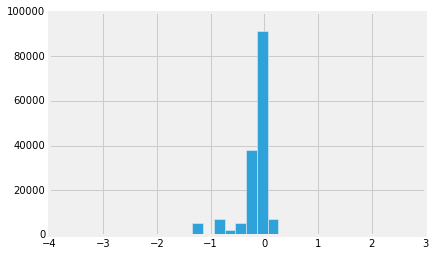

In [18]:
np.log10(final_df['avgEER']).replace(-np.inf, np.nan).hist(bins=30);

In [ ]:
final_df.to_csv("final_df.csv")

In [ ]:
final_df['submetered'] = (final_df['Metered Areas (Energy)'].str.contains('Tenant Plug Load')) | (final_df['Metered Areas (Energy)'] == 'Tenant areas only')

In [ ]:
final_df[final_df['submetered'] == 0].hist('avgEER', bins=30);

In [ ]:
final_df[final_df['submetered'] == 1].hist('avgEER', bins=30);

In [19]:
final_df.to_csv("final_df-submetered.csv")

<IPython.core.display.Javascript object>